<a href="https://colab.research.google.com/github/harshmudgil97/sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4: Machine Learning/sentiment analysis/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Primary Inspection**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252233 entries, 0 to 252232
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   250040 non-null  float64
 1   review       250039 non-null  object 
 2   sentiment    250040 non-null  object 
 3   Unnamed: 3   295 non-null     object 
 4   Unnamed: 4   68 non-null      object 
 5   Unnamed: 5   26 non-null      object 
 6   Unnamed: 6   16 non-null      object 
 7   Unnamed: 7   10 non-null      object 
 8   Unnamed: 8   8 non-null       object 
 9   Unnamed: 9   4 non-null       object 
 10  Unnamed: 10  2 non-null       object 
 11  Unnamed: 11  2 non-null       object 
 12  Unnamed: 12  1 non-null       object 
 13  Unnamed: 13  1 non-null       object 
 14  Unnamed: 14  1 non-null       object 
dtypes: float64(1), object(14)
memory usage: 28.9+ MB


In [ ]:
df.head()

,Unnamed: 0,review,sentiment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0.0,Hakuna Matata. What a wonderful phrase. Hakuna...,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Obviously a second attempt at the Hugh Glass s...,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,"If some studio head, or person who was ivolved...",negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Rocknrolla rocked me big time. I fall for ever...,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,"Finally, harry potter has a better movie than ...",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['Unnamed: 0'].isnull()].tail()

,Unnamed: 0,review,sentiment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
252228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252232,NaN,NaN,NaN,has done it throughout his entire life. Sam L...,they both beat each other like angry dogs. GO...,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* **There are some instances, which are entirely composed on NaN values**
* **We will remove them latter, after further verification**

In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)
df.replace('', np.nan, inplace=True)

# **Check for mislabelling**

In [ ]:
df[~df['Unnamed: 13'].isnull()]

,review,sentiment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
127862,Asuna is a school girl who likes to listen to ...,one day while listening she picks up music of...,on the way she encounters a fearsome creature,a boy named Shun saves her but he is injured ...,the legendary underground world of Agartha. A...,he is just a man who believes that Agartha ho...,some are friendly but most are fearful of 'To...,there are also the cursed Ikozu,creatures who dwell in the shadows and will d...,this looks fantastic. From his trademark shin...,in fact the film it reminded me of most was H...,the Ikozu are particularly creepy and we see ...,especially if you enjoyed Shinkai's previous ...,positive


In [ ]:
df[~df['Unnamed: 13'].isnull()].loc[127862,'review']

'Asuna is a school girl who likes to listen to music she picks up on her homemade crystal radio'

In [ ]:
df[~df['Unnamed: 13'].isnull()].loc[127862,'sentiment']

' one day while listening she picks up music of a type she has never heard before. The next day in school they are warned that a bear has been spotted nearby but she still tries to go to the remote spot where she hear the music'

In [ ]:
df.sentiment.value_counts()

positive                                                                                                                                                                                                                                                                                    131632
negative                                                                                                                                                                                                                                                                                    118115
)                                                                                                                                                                                                                                                                                               11
 plus the general use of magic in the movie was pretty spot-on.                                                                

In [ ]:
df[df.sentiment == ')'].head(11)

,review,sentiment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
42579,Get rid of that character from the TV series.....,),negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47440,Amazing movie. It feels good to see the patria...,),positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70424,I would rate the show higher than an eight but...,),positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73380,Funny af ! I really love all the characters in...,),positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136136,All I'm going to say is this movie was FRICKIN...,),positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139702,Kevin Hart is brilliant and so funny! Loved th...,),positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150339,This was the most boring horror movie i have e...,),negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153902,Anything James Spader stars in is always excel...,),positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174152,i am watching the show on Cartoon network its ...,),positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179129,SPOILER!! The film is superb. Now what to make...,),positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.loc[42579,'sentiment'],df.loc[42579,'review']

(')', 'Get rid of that character from the TV series..read the comics ')

* **It can be noted that, for some instances, the text is split into multiple columns. We will collate the text and get the correct label in the sentiment column for such instances**

# **Treating mislabelling**

#Type 1 Mislabelling: Invalid value ( ')' ) in the sentiment column and sentiment in 'Unnamed: 3' column

In [ ]:
mis_cat_1 = df[df.sentiment == ')'].index.to_list()
df['sentiment'] = df.apply(lambda x: x['Unnamed: 3'] if x['sentiment'] == ')' else x['sentiment'], axis=1)

In [ ]:
df.loc[mis_cat_1,'sentiment']

42579     negative
47440     positive
70424     positive
73380     positive
136136    positive
139702    positive
150339    negative
153902    positive
174152    positive
179129    positive
183516    positive
Name: sentiment, dtype: object

#Type 2 Mislabelling: Misplaced sentiment label and review split into multiple columns 

# Correcting Review Column

In [ ]:
def collator(c):
  collated_review = ''
  for i in c.index:
    if c[i]!= 'positive' and c[i]!= 'negative' and type(c[i]) == str:
      collated_review +=c[i]
  
  return collated_review

In [ ]:
df['mod_review'] = df.apply(lambda c:collator(c), axis=1)

In [ ]:
df[~df['Unnamed: 13'].isnull()]['mod_review'][127862]

"Asuna is a school girl who likes to listen to music she picks up on her homemade crystal radio one day while listening she picks up music of a type she has never heard before. The next day in school they are warned that a bear has been spotted nearby but she still tries to go to the remote spot where she hear the music on the way she encounters a fearsome creature a boy named Shun saves her but he is injured in the process. Not long afterwards she learns that he has died but can't quite believe it. She returns to the spot where she last saw him and thinks she sees him again but it is his brother Shin. Surprisingly they are met by a military force that is determined to find its way into Shin's home the legendary underground world of Agartha. Asuna and Shin manage to flee to Agartha but the leader of the armed force gets in to although he is revealed to be somebody who may not be so bad after all he is just a man who believes that Agartha holds the secret to bringing his late wife back 

* **We successfully collated the review column**

# Correcting Sentiment Column

In [ ]:
def labeler(c):
  for i in c.index:
    if c[i] == 'positive' or c[i] == 'negative':
      return c[i]

In [ ]:
df['mod_sentiment'] = df.apply(lambda c:labeler(c), axis=1)

In [ ]:
df['mod_sentiment'].value_counts()

positive    131810
negative    118232
Name: mod_sentiment, dtype: int64

In [ ]:
df[df['mod_sentiment'].isnull()]

,review,sentiment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,mod_review,mod_sentiment
250040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,None
250041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,None
250042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,None
250043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,None
250044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,None
252228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,None
252229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,None
252230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,None


In [ ]:
null_list = df[df['mod_sentiment'].isnull()].index.to_list()
len(null_list)

2191

* **Thus we can verify that there are 2191 rows, which are entirely composed of NaN values.**

In [ ]:
df.drop(df.index[null_list], inplace=True)  #Removing NaN instances
len(df[df['mod_sentiment'].isnull()].index.to_list())

0

* **We successfully removed uneccessary columns and NaN instances.**
* **We have also treated the data for Type 1 and Type 2 mislabeling.**

In [ ]:
collated_df = df[['mod_sentiment','mod_review']].copy()

# Checking for empty strings

In [ ]:
collated_df[collated_df.mod_sentiment == '']

,mod_sentiment,mod_review


In [ ]:
collated_df[collated_df.mod_review == '']

,mod_sentiment,mod_review
250425,negative,


In [ ]:
df.loc[250425]

review                NaN
sentiment             NaN
Unnamed: 3       negative
Unnamed: 4            NaN
Unnamed: 5            NaN
Unnamed: 6            NaN
Unnamed: 7            NaN
Unnamed: 8            NaN
Unnamed: 9            NaN
Unnamed: 10           NaN
Unnamed: 11           NaN
Unnamed: 12           NaN
Unnamed: 13           NaN
Unnamed: 14           NaN
mod_review               
mod_sentiment    negative
Name: 250425, dtype: object

* **We can remove this instance, since it has no value for the review column.**

In [ ]:
collated_df.drop(250425, inplace=True)

In [ ]:
collated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250041 entries, 0 to 252232
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   mod_sentiment  250041 non-null  object
 1   mod_review     250041 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


In [ ]:
collated_df['mod_sentiment'] = collated_df['mod_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
collated_df.head()

,mod_sentiment,mod_review
0,1,Hakuna Matata. What a wonderful phrase. Hakuna...
1,1,Obviously a second attempt at the Hugh Glass s...
2,0,"If some studio head, or person who was ivolved..."
3,1,Rocknrolla rocked me big time. I fall for ever...
4,1,"Finally, harry potter has a better movie than ..."


In [ ]:
collated_df.tail()

,mod_sentiment,mod_review
250036,1,As a father of four in his forties I thought t...
250037,0,"Prior to this release, Neil LaBute had this to..."
250038,0,"Ugly, heartless Hollywood crap that expects no..."
250039,0,What was Steven Seagal thinking? I mean firstl...
252232,1,has done it throughout his entire life. Sam L...


In [ ]:
collated_df.describe(include='all')

,mod_sentiment,mod_review
count,250041.000000,250041
unique,NaN,250041
top,NaN,"Those who are seating in a AC room, never face..."
freq,NaN,1
mean,0.527154,NaN
std,0.499263,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN


# **Preprocessing and Feature Engineering**

# Removing Stop Words, Punctuations and Non-English Language Words

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('words')

import string
from nltk.corpus import stopwords
from nltk.corpus import words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
words_vocab = set(words.words())
stoppers = set(stopwords.words("english"))

In [ ]:
#Removing Stop Words and Punctuations
def text_process(re):
    #Removing punctuations
    nopunc = [char for char in re if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    #Removing numbers
    nonum = ''.join([i for i in nopunc if not i.isdigit()])

    #Removing stop words
    nostop = ' '.join([word for word in nonum.split() if word.lower() not in stoppers])

    #removing gibberish terms
    return ' '.join([w.lower() for w in nostop.split() if w.lower() in words_vocab])

In [ ]:
collated_df['processed_review'] = collated_df['mod_review'].apply(text_process)

In [ ]:
collated_df.head()

,mod_sentiment,mod_review,processed_review
0,1,Hakuna Matata. What a wonderful phrase. Hakuna...,wonderful phrase aint passing phrase lion king...
1,1,Obviously a second attempt at the Hugh Glass s...,obviously second attempt glass story man wilde...
2,0,"If some studio head, or person who was ivolved...",studio head person film ever must apologize ha...
3,1,Rocknrolla rocked me big time. I fall for ever...,big time fall everything organized crime time ...
4,1,"Finally, harry potter has a better movie than ...",finally harry potter better movie book


# Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemma(text):    
    text = [wnl.lemmatize(word) for word in text.split()]
    return ' '.join(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
collated_df['processed_review'] = collated_df['processed_review'].apply(lemma)

In [ ]:
collated_df.head()

,mod_sentiment,mod_review,processed_review
0,1,Hakuna Matata. What a wonderful phrase. Hakuna...,wonderful phrase aint passing phrase lion king...
1,1,Obviously a second attempt at the Hugh Glass s...,obviously second attempt glass story man wilde...
2,0,"If some studio head, or person who was ivolved...",studio head person film ever must apologize ha...
3,1,Rocknrolla rocked me big time. I fall for ever...,big time fall everything organized crime time ...
4,1,"Finally, harry potter has a better movie than ...",finally harry potter better movie book


# **Exploratory Analysis**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

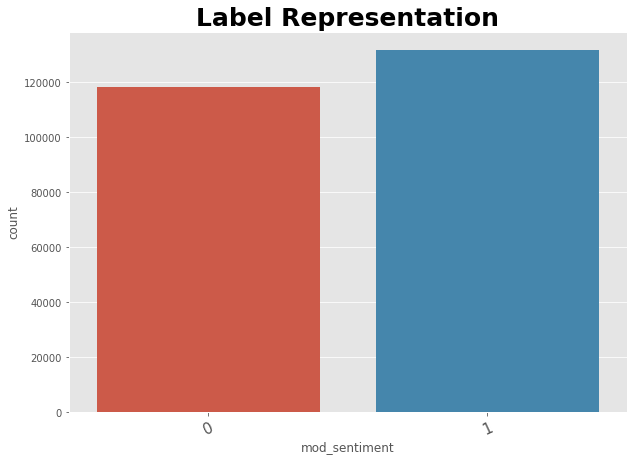

In [ ]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x=collated_df['mod_sentiment'])
ax.set_title('Label Representation', fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,rotation=25)

* **There is a very slight imbalance in the dataset**

In [ ]:
collated_df['length']=collated_df['processed_review'].apply(lambda x: len(x.split()))

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

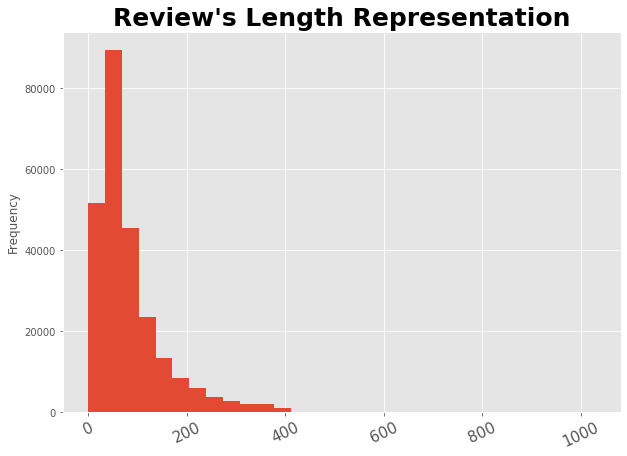

In [ ]:
plt.figure(figsize=(10,7))
ax = collated_df['length'].plot(bins=30,kind='hist')
ax.set_title("Review's Length Representation", fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,rotation=25)

In [ ]:
collated_df['length'].describe()

count    250041.000000
mean         83.635192
std          72.343530
min           0.000000
25%          40.000000
50%          61.000000
75%         104.000000
max        1029.000000
Name: length, dtype: float64

In [ ]:
len(collated_df[collated_df['length']<5])

1782

In [ ]:
gibber_percent = round(len(collated_df[collated_df['length']<5])/len(collated_df) * 100,2)
print(f'{gibber_percent} %')

0.71 %


* **These reviews have words, which are either gibberish or very specific. Thus, they would not help in generalizing the model. As a result, we will get rid of these instances**

In [ ]:
gibber_list = collated_df[collated_df['length']<5].index.to_list()
len(gibber_list)

1782

In [ ]:
collated_df.drop(collated_df.index[gibber_list], inplace=True)  #Removing Gibberish instances
len(df[df['mod_sentiment'].isnull()].index.to_list())

0

In [ ]:
collated_df['length'].describe()

count    248259.000000
mean         84.211590
std          72.280906
min           5.000000
25%          41.000000
50%          62.000000
75%         104.000000
max        1029.000000
Name: length, dtype: float64

* **There are few reviews with a lot of words, which are affecting the standard deviation and mean**
* **While vectorizing we will fix maximum number of samples, closer to the median value of length. This will ensure, better generalization**

In [ ]:
collated_df.head()

,mod_sentiment,mod_review,processed_review,length
0,1,Hakuna Matata. What a wonderful phrase. Hakuna...,wonderful phrase aint passing phrase lion king...,45
1,1,Obviously a second attempt at the Hugh Glass s...,obviously second attempt glass story man wilde...,26
2,0,"If some studio head, or person who was ivolved...",studio head person film ever must apologize ha...,99
3,1,Rocknrolla rocked me big time. I fall for ever...,big time fall everything organized crime time ...,51
4,1,"Finally, harry potter has a better movie than ...",finally harry potter better movie book,6


# **Train-Test Split and Vectorization**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(collated_df['processed_review'],collated_df['mod_sentiment'],test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,3),max_features = 200,sublinear_tf = True)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# **Training and Evaluation**

#Approach: 
* **Although we do not expect linearity, we do not exactly know the patterns in the dataset. Since we have a large quantity of data and potential non-linearities, we can expect XGBOOST to perform well.**
* **In order to evaluate this hypothesis, let us, first evaluate raw performance of different models. Latter on, we will fine-tune, best performing models using CV and hyper-parameter tunning.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
report = pd.DataFrame(columns = ['logistic_regression','random_forest','gaussian_naive_bayes','XGBOOST'], index = ['test_acc','train_acc','test_precision','train_precision','test_recall','train_recall','test_f1-score','train_f1-score','test_auc','train_auc'])

In [ ]:
#Generating Evaluation Matrix
def evaluator(y_acc_test,y_acc_train,y_predicts_test,y_predicts_train,classifier_name,y_test_prob,y_train_prob):
  train_accuracy = accuracy_score(y_acc_train,y_predicts_train)
  test_accuracy = accuracy_score(y_acc_test,y_predicts_test)

  train_cm = confusion_matrix(y_acc_train,y_predicts_train)
  test_cm = confusion_matrix(y_acc_test,y_predicts_test )

  prec_train = train_cm[1][1]/(train_cm[1][1] + train_cm[0][1])
  prec_test = test_cm[1][1]/(test_cm[1][1] + test_cm[0][1])

  recall_train = train_cm[1][1]/(train_cm[1][0] + train_cm[1][1])
  recall_test = test_cm[1][1]/(test_cm[1][0] + test_cm[1][1])

  f1_train = (2*prec_train*recall_train)/(recall_train + prec_train)
  f1_test = (2*prec_test*recall_test)/(recall_test + prec_test)

  auc_train = roc_auc_score(y_acc_train,y_train_prob)
  auc_test = roc_auc_score(y_acc_test,y_test_prob)

  eval_list = [test_accuracy,train_accuracy,prec_test,prec_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train]
  
  report[classifier_name] = eval_list

In [ ]:
#base model pipeline
def model_result(train_X,train_y,test_X,test_y):

  #Applying Logistic Regression:

  model = LogisticRegression()
  model.fit(train_X, train_y)

  lr_class_train_pred = model.predict(train_X)
  lr_class_test_pred = model.predict(test_X)

  lr_prob_train_pred = model.predict_proba(train_X)[:,1]
  lr_prob_test_pred = model.predict_proba(test_X)[:,1]



# #X----------------------------------------------------------------------------------------------------------------------X#


#   #Applying SVM
#   svm_clf = SVC(probability=True)
#   svm_clf.fit(train_X,train_y)
  
#   svm_class_train_pred = svm_clf.predict(train_X)
#   svm_class_test_pred = svm_clf.predict(test_X)

#   svm_prob_train_pred = svm_clf.predict_proba(train_X)[:,1]
#   svm_prob_test_pred = svm_clf.predict_proba(test_X)[:,1]



# #X----------------------------------------------------------------------------------------------------------------------X#

#   #Applying KNN
#   knn = KNeighborsClassifier(n_neighbors=2,weights='uniform').fit(train_X,train_y)
#   knn_class_train_pred = knn.predict(train_X)
#   knn_class_test_pred = knn.predict(test_X)

#   knn_prob_train_pred = knn.predict_proba(train_X)[:,1]
#   knn_prob_test_pred = knn.predict_proba(test_X)[:,1]


#X----------------------------------------------------------------------------------------------------------------------X#    

  #Applying Naive Bayes
  nbc = GaussianNB().fit(train_X, train_y)
  nbc_class_train_pred = nbc.predict(train_X)
  nbc_class_test_pred = nbc.predict(test_X)
  
  nbc_prob_train_pred = nbc.predict_proba(train_X)[:,1]
  nbc_prob_test_pred = nbc.predict_proba(test_X)[:,1]




#X----------------------------------------------------------------------------------------------------------------------X#


  #Applying Random Forest
  rf_model = RandomForestClassifier()

  rf_model.fit(train_X,train_y)

  rf_class_train_pred = rf_model.predict(train_X)
  rf_class_test_pred = rf_model.predict(test_X)

  rf_prob_train_pred = rf_model.predict_proba(train_X)[:,1]
  rf_prob_test_pred = rf_model.predict_proba(test_X)[:,1]


#X----------------------------------------------------------------------------------------------------------------------X#

  #Applying XGBoost
  clf_xgb = XGBClassifier()
  clf_xgb.fit(train_X,train_y)

  xg_class_train_pred = clf_xgb.predict(train_X)
  xg_class_test_pred = clf_xgb.predict(test_X)

  xg_prob_train_pred = clf_xgb.predict_proba(train_X)[:,1]
  xg_prob_test_pred = clf_xgb.predict_proba(test_X)[:,1]


#X----------------------------------------------------------------------------------------------------------------------X#


  #Applying DNN
  # batch_size = 512
  # train_ds = tf.data.Dataset.from_tensor_slices((train_X, train_y)).shuffle(len(train_X)).batch(batch_size)
  # val_ds = tf.data.Dataset.from_tensor_slices((test_X, test_y)).batch(batch_size)

  # model = keras.Sequential([
  #     keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
  #     keras.layers.Dense(512, activation='relu'),
  #     keras.layers.Dense(256, activation='relu'),
  #     keras.layers.Dense(128, activation='relu'),
  #     keras.layers.Dense(64, activation='relu'),
  #     keras.layers.Dense(32, activation='relu'),
  #     keras.layers.Dropout(0.5),
  #     keras.layers.Dense(9, activation='softmax')
  # ])
  # model.compile(optimizer='adam', 
  #               loss='sparse_categorical_crossentropy',
  #               metrics=['accuracy'])

  # fit = model.fit(train_ds, validation_data=val_ds, epochs=200)

  # dnn_class_train_preds = np.argmax(model.predict(train_X),axis=-1)
  # dnn_class_test_preds = np.argmax(model.predict(test_X),axis=-1)
  # dnn_prob_train_pred = np.argmax(model.predict_proba(train_X),axis=-1)
  # dnn_prob_test_pred = np.argmax(model.predict_proba(train_X),axis=-1)


#X----------------------------------------------------------------------------------------------------------------------X#

  #Calling the fuction to conduct evaluation
  evaluator(test_y,train_y,lr_class_test_pred,lr_class_train_pred,'logistic_regression',lr_prob_test_pred,lr_prob_train_pred)
  evaluator(test_y,train_y,rf_class_test_pred,rf_class_train_pred,'random_forest',rf_prob_test_pred,rf_prob_train_pred)
  evaluator(test_y,train_y,nbc_class_test_pred,nbc_class_train_pred,'gaussian_naive_bayes',nbc_prob_test_pred,nbc_prob_train_pred)
  evaluator(test_y,train_y,xg_class_test_pred,xg_class_train_pred,'XGBOOST',xg_prob_test_pred,xg_prob_train_pred)

  #evaluator(test_y,train_y,knn_class_test_pred,knn_class_train_pred,'KNN',knn_prob_test_pred,knn_prob_train_pred)
  #evaluator(test_y,train_y,svm_class_test_pred,svm_class_train_pred,'SVM',svm_prob_test_pred,svm_prob_train_pred)
  #evaluator(test_y,train_y,dnn_prob_test_pred,dnn_prob_train_pred,'DNN',dnn_class_test_pred,dnn_class_train_pred)

In [ ]:
model_result(X_train,y_train,X_test,y_test)

In [ ]:
report

,logistic_regression,random_forest,gaussian_naive_bayes,XGBOOST
test_acc,0.810139,0.795718,0.786393,0.779062
train_acc,0.808662,0.998394,0.787001,0.783205
test_precision,0.811204,0.796101,0.805359,0.762299
train_precision,0.811559,0.998186,0.807673,0.765999
test_recall,0.831843,0.821060,0.781995,0.841398
train_recall,0.829540,0.998767,0.782045,0.847522
test_f1-score,0.821394,0.808388,0.793505,0.799898
train_f1-score,0.820451,0.998477,0.794653,0.804701
test_auc,0.892698,0.877952,0.861420,0.867742
train_auc,0.892331,0.999953,0.861818,0.870917


* **Random Forest, without any hyper-parameter tunning, is getting overfitted on the data.**
* **Logistic Regression, Gaussian Naive Bayes Algorithms and XGBOOST have given a balanced performance**
* **If we compare XGBoost with Logistic Regression Algorithm, then in the case of XGBoost, we gain 3% points of recall and loose 6% points of precision, in comparison to Logistic Regression Model**
* **Overall F1-score of Logistic Regression Model is higher than the XGBoost model**
* **So, we will perfrom Hyperparameter tuning for both the models to evaluate our hypothesis**

#**Tuning the Models**

#Logistic Regression

In [ ]:
model = LogisticRegression(class_weight='balanced')
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
#define grid search
grid = dict(penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
rs_search = RandomizedSearchCV(model,grid, n_jobs=-1,cv=cv)
rs_result = rs_search.fit(X_train, y_train)

model = rs_search.best_estimator_

lr_class_train_pred = model.predict(X_train)
lr_class_test_pred = model.predict(X_test)

In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,lr_class_train_pred))
print("\n")
print(classification_report(y_test,lr_class_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     94167
           1       0.82      0.81      0.82    104440

    accuracy                           0.81    198607
   macro avg       0.81      0.81      0.81    198607
weighted avg       0.81      0.81      0.81    198607



              precision    recall  f1-score   support

           0       0.79      0.80      0.80     23369
           1       0.82      0.81      0.82     26283

    accuracy                           0.81     49652
   macro avg       0.81      0.81      0.81     49652
weighted avg       0.81      0.81      0.81     49652



# XGBoost

In [ ]:
'''TAKES MORE THAN 2 HOURS TO RUN'''
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,12]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
clf_xgb = XGBClassifier()

xg_grid = RandomizedSearchCV(clf_xgb,param_dict,cv = 5, verbose=2, scoring='roc_auc')
xg_grid.fit(X_train,y_train)
xgb_optimal_model = xg_grid.best_estimator_

xg_class_train_pred = xgb_optimal_model.predict(X_train)
xg_class_test_pred = xgb_optimal_model.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total= 1.6min
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total= 1.6min
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total= 1.6min
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total= 1.6min
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total= 1.6min
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=12 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=12, total= 3.6min
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=12 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=12, total= 3.5min
[CV] n_estimators=50, min_samples_split=150,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 111.2min finished


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,xg_class_train_pred))
print("\n")
print(classification_report(y_test,xg_class_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85     94167
           1       0.85      0.89      0.87    104440

    accuracy                           0.86    198607
   macro avg       0.86      0.86      0.86    198607
weighted avg       0.86      0.86      0.86    198607



              precision    recall  f1-score   support

           0       0.80      0.75      0.78     23369
           1       0.79      0.84      0.81     26283

    accuracy                           0.80     49652
   macro avg       0.80      0.79      0.79     49652
weighted avg       0.80      0.80      0.80     49652



* **We can note that, Logistic Regression Model, has a better F1-score.**
* **Moreover, the XGBoost model, can be seen slightly overfitting. This could be a result of potential linearities present in the dataset and of the fact that XGBoost is a data demaninding model. It is a posibility that, the data is simply not expressive enough, for XGBoost model to capture it's details and patterns**
# **So we can reject our initial Hypothesis. Logistic Regression will be the model of our choice.**